Number of points inside the boundary: 1097


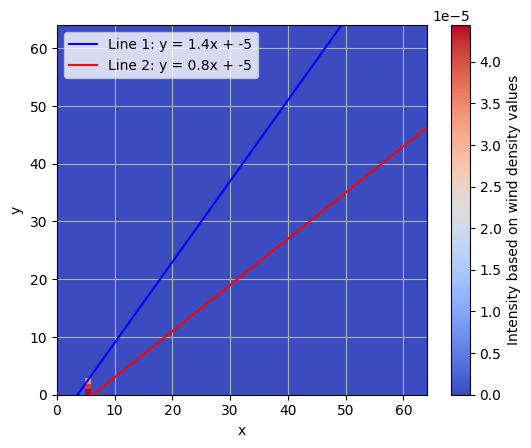

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Correct path to where the file is stored in this environment
wind_density_data = np.loadtxt('parameters/wind_density_output.csv', delimiter=',')

def plot_heatmap_with_wind_density(x_range=(0, 64), y_range=(0, 64)):
    x = np.linspace(x_range[0], x_range[1], wind_density_data.shape[1])
    y = np.linspace(y_range[0], y_range[1], wind_density_data.shape[0])
    X, Y = np.meshgrid(x, y)

    m1 = 1.4
    m2 = 0.8
    c1 = -5
    c2 = -5

    Y1 = m1 * X + c1
    Y2 = m2 * X + c2

    inside_boundary = (Y >= np.minimum(Y1, Y2)) & (Y <= np.maximum(Y1, Y2))

    intensity_masked = np.where(inside_boundary, wind_density_data, 0)
    print(f'Number of points inside the boundary: {np.sum(inside_boundary)}')
    plt.imshow(intensity_masked, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='coolwarm', alpha=1)
    plt.plot(x, m1*x + c1, label=f'Line 1: y = {m1}x + {c1}', color='blue')
    plt.plot(x, m2*x + c2, label=f'Line 2: y = {m2}x + {c2}', color='red')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.colorbar(label='Intensity based on wind density values')
    plt.show()

plot_heatmap_with_wind_density()
